In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/hermawanwiwid/Regression/master/Advertising_data.csv'
data = pd.read_csv(url)

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


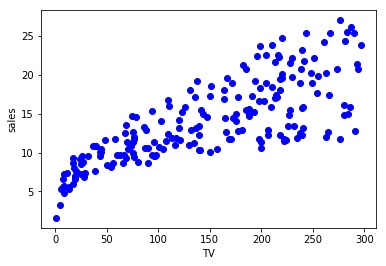

In [0]:
import matplotlib.pyplot as plt
cdf = data[['TV','sales']]
plt.scatter(cdf.TV, cdf.sales,  color='blue')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

In [0]:
X = cdf.TV
Y = cdf.sales
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

0.04753664043301969 7.032593549127705


In [0]:
sumx = np.sum(X)
sumy = np.sum(Y)
sumx2 = np.sum(X**2)
sumxy = X @ Y
m = len(cdf.TV)
a = np.array([[m, sumx], [sumx,sumx2]])
b = np.array([sumy,sumxy])
xBar = np.linalg.inv(a) @ b.T

print(xBar)
print(np.linalg.inv(a))
# print(xBar[1]*X+xBar[0])
# print(X)

[7.03259355 0.04753664]
[[ 1.97403984e-02 -1.00245836e-04]
 [-1.00245836e-04  6.81747360e-07]]


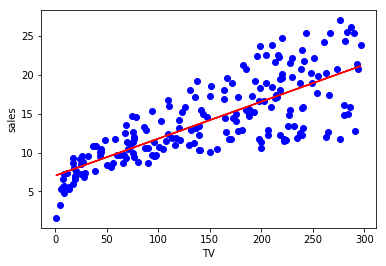

In [0]:
plt.scatter(cdf.TV, cdf.sales,  color='blue')
plt.plot(X,xBar[1]*X+xBar[0], color ='r')
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

In [0]:
# Y_pred = m*X + c

# plt.scatter(X,Y) # actual
# # plt.scatter(X, Y_pred, color='red')
# plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
# plt.show()

## Try using library

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['sales']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.04699465]]
Intercept:  [6.99400373]


Text(0, 0.5, 'sales')

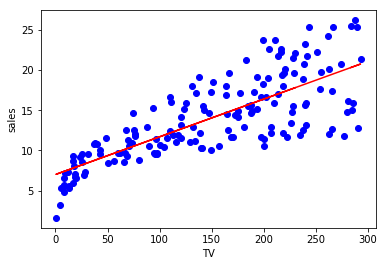

In [0]:
plt.scatter(train.TV, train.sales,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("TV")
plt.ylabel("sales")

In [0]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['sales']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2.48
Residual sum of squares (MSE): 10.91
R2-score: 0.36
